In [26]:
# load libraries
import numpy as np
import os
import sys
sys.path.append("../")
from functions_EDX import *
import time
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import pickle
import wget
import gdown

## Download

In [12]:
url_abundance_maps = "https://drive.google.com/uc?export=download&id=1Wwkd5HeddZowBTMnsSfDGfX6Z0cB3LSu"
gdown.download(url_abundance_maps,'../../../primary_data/abundance_maps.npz',quiet='False')

'../../../primary_data/abundance_maps.npz'

## load data

In [14]:
embeddings = np.load('../../../primary_data/abundance_maps.npz')['embeddings']
cluster_labels = np.load('../../../primary_data/abundance_maps.npz')['cluster_labels']

## Necessary variables

In [25]:
n_clusters = len(np.unique(cluster_labels))-1

## Notes:
* Still missing, could be added later: highlighted tile and cluster populations, as they were not saved in the abundance map array

## Clustering plot

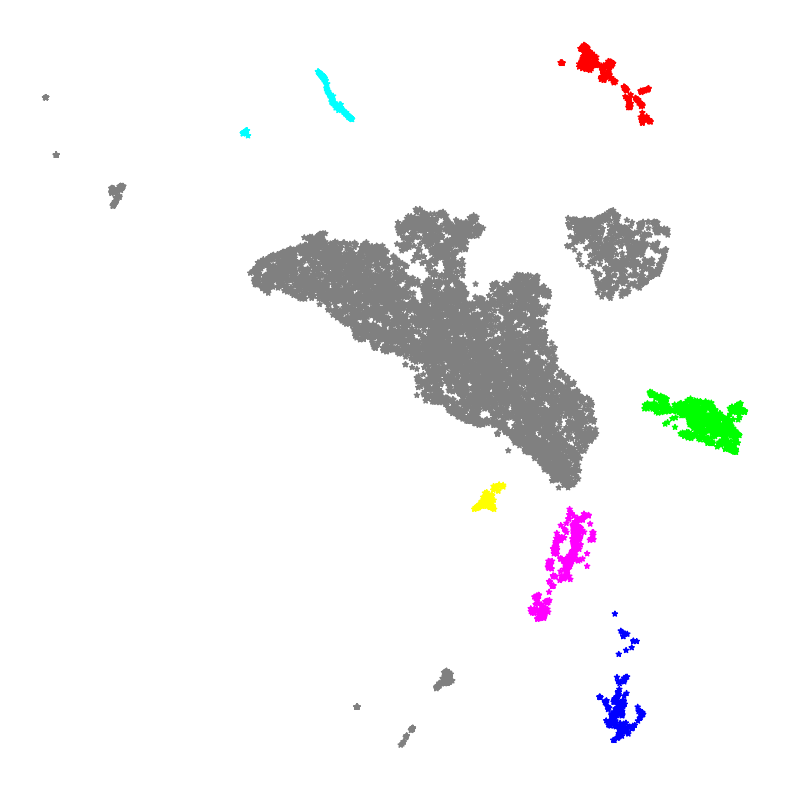

In [49]:
%matplotlib inline 


# options
outliers = False
clustered = (cluster_labels >= 0)


# Colors
chosen_tiles = [3,4,6,1,9,7]
chosen_colors = [[1,0,0], [0,1,0], [0,0,1], [0,1,1], [1,0,1], [1,1,0]]
colors = [[0.5,0.5,0.5] for x in range(n_clusters)] 
for idx,tile in enumerate(chosen_tiles):
    colors[tile] = chosen_colors[idx]



# start figure
f, ax = plt.subplots(figsize=(8,8))
sns.despine(left=True, bottom=True, right=True)

if outliers:
    ax.scatter(embeddings[~clustered, 0],embeddings[~clustered, 1],color=(0.5, 0.5, 0.5),s=5,marker='x',alpha=1)
    ax.scatter(embeddings[~clustered, 0],embeddings[~clustered, 1],color=(0.5, 0.5, 0.5),s=5,marker='x',alpha=0.1)

high_cmap = ListedColormap([colors[i] for i in np.unique(cluster_labels[clustered])])
sct1 = ax.scatter(embeddings[clustered, 0],embeddings[clustered, 1],c=LabelEncoder().fit_transform(cluster_labels[clustered]),marker='*',s=15,cmap=high_cmap, alpha=1);

# just for the cbar
sct3 = ax.scatter(embeddings[clustered, 0],embeddings[clustered, 1],c=cluster_labels[clustered],marker='.',s=0,cmap=cmap, alpha=1);


ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False)
plt.axis('off')


f.tight_layout()
plt.savefig('../svg/figure_3Clustering.svg')